import necessary libraries including keras and tesnorflow

In [3]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
import tensorflow





load mnist dataset

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


Demo image visualization using matplotlib

In [12]:
import matplotlib.pyplot as plt

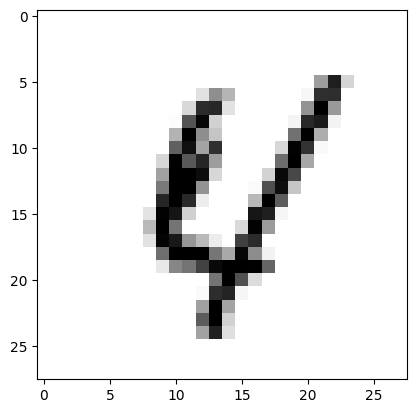

In [16]:
demo_digit=x_train[700]
Image=demo_digit.reshape(28,28)
plt.imshow(Image,cmap="binary")
plt.show()

PREPROCESSING DATA

Reshaping the train and test data

In [32]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
num_classes=10

In [22]:
x_train.shape

(60000, 28, 28, 1)

Converting vectors to binary matrices

In [25]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [27]:
#convert x type to float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test/=255


In [29]:
x_train.shape[0]

60000

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [41]:
batch_size=128
epochs=10
model=keras.models.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes,activation='softmax')

])
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

C:\Users\Amit\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The CNN model has successfully trained")
model.save('mnist_data.h5')
print("Saving the model as mnist_data.h5")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 111ms/step - accuracy: 0.1331 - loss: 2.2883 - val_accuracy: 0.4625 - val_loss: 2.2244
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.2854 - loss: 2.2164 - val_accuracy: 0.6656 - val_loss: 2.1291
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.4375 - loss: 2.1223 - val_accuracy: 0.6955 - val_loss: 1.9953
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.5363 - loss: 1.9875 - val_accuracy: 0.7149 - val_loss: 1.8100
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.5857 - loss: 1.8103 - val_accuracy: 0.7406 - val_loss: 1.5743
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.6254 - loss: 1.5938 - val_accuracy: 0.7660 - val_loss: 1.3206
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.6578 - loss: 1.3711 - val_accuracy: 0.7910 - val_loss: 1.0949
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.6887 - loss: 1.1892 -

The CNN model has successfully trained
Saving the model as mnist_data.h5


In [43]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7023200392723083
Test accuracy: 0.833299994468689
